<a href="https://colab.research.google.com/github/vrhughes/DS4002-Group13/blob/main/SCRIPTS/TwitterCCData_VH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cloning Git Location
! git clone https://github.com/vrhughes/DS4002-Group13/

Cloning into 'DS4002-Group13'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 87 (delta 30), reused 15 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (87/87), 6.21 MiB | 8.81 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [5]:
# Reading in the csv of data
data = pd.read_csv('/content/DS4002-Group13/DATA/twitter_sentiment_data.csv')
data.head()

# data is a DataFrame (43943, 3)
# In the sentiment column 1 is pro/believes, -1 is anti/non-believer, 0 is neutral

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [6]:
# Basic Cleaning Of "data"

# Deleting tweetid column
data.drop(['tweetid'], axis = 1, inplace = True)
print("Dropped tweetid column")
print(data.head())

Dropped tweetid column
   sentiment                                            message
0         -1  @tiniebeany climate change is an interesting h...
1          1  RT @NatGeoChannel: Watch #BeforeTheFlood right...
2          1  Fabulous! Leonardo #DiCaprio's film on #climat...
3          1  RT @Mick_Fanning: Just watched this amazing do...
4          2  RT @cnalive: Pranita Biswasi, a Lutheran from ...


In [7]:
# Finding most frequently used words (called tokens)
import nltk
nltk.download('punkt_tab')

# Adding "tokenized_tweet" column using nltk.word_tokenize for each tweet
data['tokenized_tweet'] = data['message'].apply(nltk.word_tokenize)
data.head()

# The tokenized_tweet column contains series of tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,sentiment,message,tokenized_tweet
0,-1,@tiniebeany climate change is an interesting h...,"[@, tiniebeany, climate, change, is, an, inter..."
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,"[RT, @, NatGeoChannel, :, Watch, #, BeforeTheF..."
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,"[Fabulous, !, Leonardo, #, DiCaprio, 's, film,..."
3,1,RT @Mick_Fanning: Just watched this amazing do...,"[RT, @, Mick_Fanning, :, Just, watched, this, ..."
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...","[RT, @, cnalive, :, Pranita, Biswasi, ,, a, Lu..."


In [8]:
# Preparting to count tokens by frequency
# Importing necessary packages
from collections import Counter
from nltk.corpus import stopwords
import string

# Creating stopwords to exclude from the token counting
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

# Including punctuation in stopwords
stop_words.update(list(string.punctuation))
print(stop_words)

# Adding stopwords specific to our data
tw_stopwords = ['rt', 'https', "'", "'s", "n't", "...", "…", 'http', "’", 'amp', 'would', 'one', 'q', 'you', 'make', "'m", "//t.co/sjofonã¢â‚¬â¦", "‘"]
incl_stop = stop_words.union(tw_stopwords)

# Excluding stopwords specific to our data
excl_stop = {'against', "isn't", 'doesn', "don't", "shouldn't"}
new_stop = set([word for word in incl_stop if word not in excl_stop])

# Print out stopwords
print(new_stop)

{"should've", 'him', "isn't", "you're", "needn't", 'yourself', 'hasn', 'they', "don't", "you'd", 'again', 'my', 'other', 'yours', 'who', 'aren', 'wouldn', 'no', "hadn't", 'here', 'o', 'below', 's', 'does', 'her', 'our', 'what', 'for', 'myself', 'mightn', 't', 'will', 'during', 'those', 'further', 'then', "aren't", 'its', "you'll", 'through', 'whom', "doesn't", 'hadn', 'these', 'over', 'when', 'some', 'own', 'haven', "that'll", 'his', 'she', 'in', 'few', 'it', 'weren', 'he', 'not', 'we', 'have', 'there', 'than', 'their', 'y', 'am', 'why', 'yourselves', 'only', "couldn't", 'before', 'too', "mightn't", 'after', 'that', 'out', "weren't", 'herself', 'because', 'shouldn', "won't", 'and', 'don', 'isn', 'just', "hasn't", 'was', 'be', 'under', 'an', "it's", "didn't", 'all', "she's", 'should', 'me', 're', "shan't", 'the', 'while', 'or', 'can', 'm', 'wasn', 'down', 'hers', "haven't", 'theirs', 'doing', 'to', 'had', 'did', 'do', 'each', 'above', 'a', "wouldn't", 'of', 'itself', "wasn't", 'as', 'fr

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [75]:
# Flattening/simplifying all the tokens in the dataframe to one list
all_tokens = [word.lower() for tokens in data['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
token_freq = Counter(all_tokens)

# Most used tokens
most_common_tokens = token_freq.most_common(30)

# Creating a dataframe with the token frequency
all_df = pd.DataFrame(most_common_tokens, columns = ['Token', 'Frequency'])

# Display
#for word, count in most_common_tokens:
#    print(f"{word}: {count}")

In [74]:
# Counting tokens in for sentiment 0 (neutral on climate change)
neutral = data['sentiment'].isin([0])
neutral_tweets = data[neutral]

# Flattening/simplifying all the tokens in the dataframe to one list
neutral_tokens = [word.lower() for tokens in neutral_tweets['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
neutral_token_freq = Counter(neutral_tokens)

# Most used tokens
neutral_common_tokens = neutral_token_freq.most_common(30)

# Creating a dataframe with the token frequency
neutral_df = pd.DataFrame(neutral_common_tokens, columns = ['Token', 'Frequency'])

# Display
#for word, count in neutral_common_tokens:
#    print(f"{word}: {count}")

In [73]:
# Counting tokens in for sentiment 1 (pro/believes in climate change)
pro = data['sentiment'].isin([1])
pro_tweets = data[pro]

# Flattening/simplifying all the tokens in the dataframe to one list
pro_tokens = [word.lower() for tokens in pro_tweets['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
pro_token_freq = Counter(pro_tokens)

# Most used tokens
pro_common_tokens = pro_token_freq.most_common(30)

# Creating a dataframe with the token frequency
pro_df = pd.DataFrame(pro_common_tokens, columns = ['Token', 'Frequency'])


# Display
#for word, count in pro_common_tokens:
#    print(f"{word}: {count}")

In [72]:
# Counting tokens in for sentiment -1 (anti/does not believe in climate change)
anti = data['sentiment'].isin([-1])
anti_tweets = data[anti]

# Flattening/simplifying all the tokens in the dataframe to one list
anti_tokens = [word.lower() for tokens in anti_tweets['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
anti_token_freq = Counter(anti_tokens)

# Most used tokens
anti_common_tokens = anti_token_freq.most_common(30)

# Creating a dataframe with the token frequency
anti_df = pd.DataFrame(anti_common_tokens, columns = ['Token', 'Frequency'])

# Display
#for word, count in anti_common_tokens:
 #   print(f"{word}: {count}")

In [71]:
# Counting tokens in for sentiment 2 (news source)
news = data['sentiment'].isin([2])
news_tweets = data[news]

# Flattening/simplifying all the tokens in the dataframe to one list
news_tokens = [word.lower() for tokens in news_tweets['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
news_token_freq = Counter(news_tokens)

# Most used tokens
news_common_tokens = news_token_freq.most_common(30)

# Creating a dataframe with the token frequency
news_df = pd.DataFrame(news_common_tokens, columns = ['Token', 'Frequency'])

# Display
#for word, count in news_common_tokens:
 #   print(f"{word}: {count}")

Do percentage comparison of tokens across 4 categories


<Axes: xlabel='Samples', ylabel='Counts'>

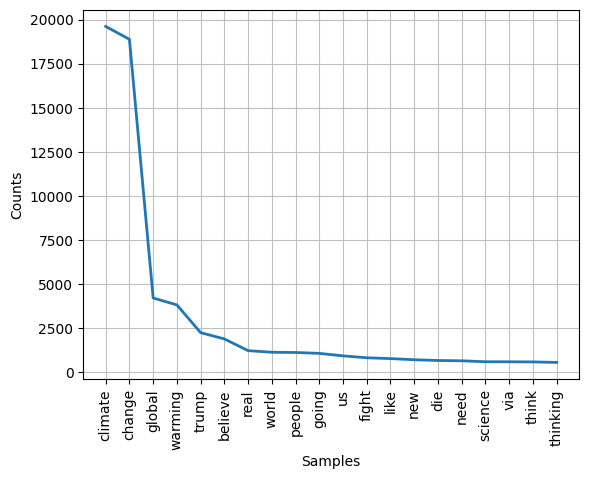

In [31]:
# Pro sentiment (believes in climate change) analysis
import matplotlib#
# Creating dataframe with token frequency
#pro_token_df = pd.DataFrame(p_common_tokens, columns = ['Token', 'Frequency'])

pro_freq = nltk.FreqDist(pro_tokens)

pro_freq.plot(20, cumulative=False)


[Text(0, 0, 'climate'),
 Text(1, 0, 'change'),
 Text(2, 0, 'global'),
 Text(3, 0, 'warming'),
 Text(4, 0, 'trump'),
 Text(5, 0, 'believe'),
 Text(6, 0, 'us'),
 Text(7, 0, 'real'),
 Text(8, 0, 'world'),
 Text(9, 0, 'via'),
 Text(10, 0, 'people'),
 Text(11, 0, 'new'),
 Text(12, 0, 'going'),
 Text(13, 0, 'fight'),
 Text(14, 0, 'like'),
 Text(15, 0, 'says'),
 Text(16, 0, 'epa'),
 Text(17, 0, 'scientists'),
 Text(18, 0, 'science'),
 Text(19, 0, 'could'),
 Text(20, 0, 'say'),
 Text(21, 0, 'think'),
 Text(22, 0, 'hoax'),
 Text(23, 0, 'need'),
 Text(24, 0, 'against'),
 Text(25, 0, 'donald'),
 Text(26, 0, 'president'),
 Text(27, 0, 'time'),
 Text(28, 0, 'know'),
 Text(29, 0, 'news')]

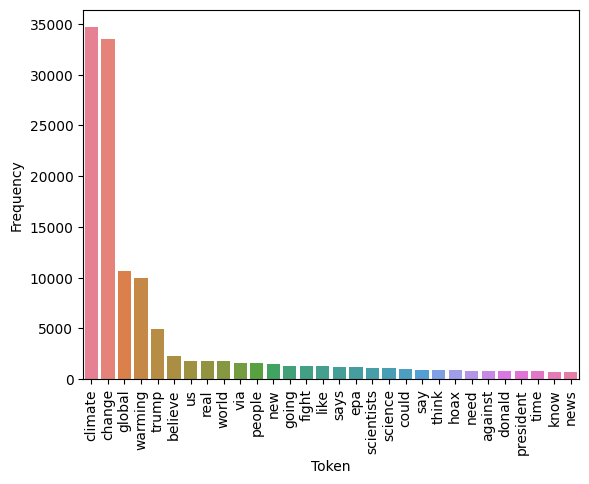

In [80]:
# above is kinda ugly, lets try something else
# plot
#plt.pie(data = all_df, x = 'Token')
#all_f = all_df['Frequency'].sum()
#plt.pie(data = all_df, x = 'Frequency', labels = all_df["Token"], autopct = '%1.1f%%')

plot1 = sns.barplot(data = all_df, x = 'Token', y = 'Frequency', hue = 'Token')
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 90)

([<matplotlib.patches.Wedge at 0x782af10cb890>,
 [Text(0.7001557815883297, 0.848399600134533, ''),
  Text(-0.9499250395703022, 0.5546552255206472, ''),
  Text(-0.9123771579384541, -0.6144655577590573, ''),
  Text(-0.4839965192180192, -0.987799255610593, ''),
  Text(-0.08571583041827457, -1.0966552769287647, ''),
  Text(0.11626317790543717, -1.0938385957093162, ''),
  Text(0.229693953622199, -1.0757512201570598, ''),
  Text(0.3257623804331658, -1.0506564003015055, ''),
  Text(0.4185048337107773, -1.0172775944454466, ''),
  Text(0.5036194730090751, -0.9779404002320702, ''),
  Text(0.5808099275265176, -0.9341626347090969, ''),
  Text(0.6527145426362893, -0.8854172608612846, ''),
  Text(0.7148315166154526, -0.8360717091573259, ''),
  Text(0.7687666177185098, -0.7867641879760687, ''),
  Text(0.818376026149215, -0.7350242715885097, ''),
  Text(0.8625025423499623, -0.6827073783399823, ''),
  Text(0.9019806814240223, -0.6296275489032042, ''),
  Text(0.9373351414284341, -0.575675978866009, ''),

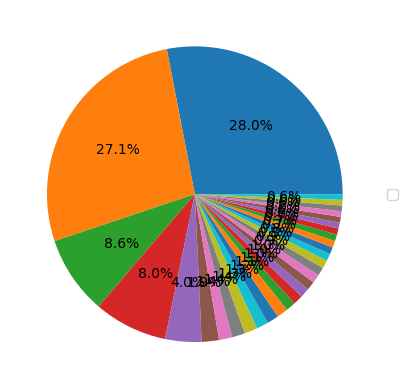

In [70]:
plt.legend(all_df['Token'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.pie(data=all_df, x='Frequency',  autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x782af120b190>,
 [Text(0.6693349161244141, 0.8729208269119966, 'climate'),
  Text(-1.001743673828233, 0.45443328657253407, 'change'),
  Text(-0.873233521531086, -0.6689269144491186, 'global'),
  Text(-0.566688201006748, -0.9427960982310734, 'warming'),
  Text(-0.2797223298796067, -1.0638399401069338, 'trump'),
  Text(-0.06942664556256471, -1.0978068777731036, 'believe'),
  Text(0.0913255896339911, -1.0962023703121628, 'real'),
  Text(0.2121717261394395, -1.0793438556025652, 'world'),
  Text(0.3252531998488243, -1.05081413960229, 'people'),
  Text(0.43170069203095085, -1.0117482456125133, 'going'),
  Text(0.5249508088115769, -0.9666574617350613, 'us'),
  Text(0.6028343665535472, -0.9201036498688524, 'fight'),
  Text(0.6703140058915553, -0.8721692115097942, 'like'),
  Text(0.7297369620336175, -0.8230941417857054, 'new'),
  Text(0.7816804108708854, -0.7739352267862758, 'die'),
  Text(0.8282926430102143, -0.7238309868575354, 'need'),
  Text(0.869467391285436

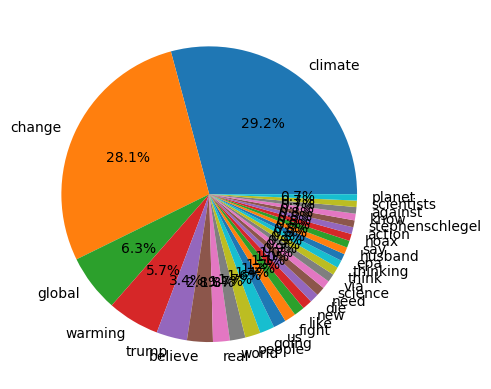

In [66]:

pro_f = pro_df['Frequency'].sum()
plt.pie(data = pro_df, x = 'Frequency', labels = "Token", autopct = '%1.1f%%')